# 축제 기간 (23.09.02~23.09.10) 연령대별 분석

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
# 한글 폰트 설정
import matplotlib.font_manager as fm
plt.rc('font', family='Malgun Gothic')

In [4]:
data_frames = []
muju_codes = [4573000000, 4573025000, 4573031000, 4573032000, 4573033000, 4573034000, 4573035000]

for i in range(2, 11):
    print(f"{i}번째 ", end=" ")
    index = str(i).rjust(2, '0')
    df_tmp = pd.read_csv(f"data/od_20230901_10/od_202309{index}_1.csv")
    to_muju = (df_tmp['dest_hdong_cd'].isin(muju_codes)) & (df_tmp['dest_purpose'] == 5)
    data_frames.append(df_tmp[to_muju])
del df_tmp

df_od = pd.concat(data_frames, axis=0)
df_od

2번째  

3번째  4번째  5번째  6번째  7번째  8번째  9번째  10번째  

,origin_hdong_cd,dest_hdong_cd,date,start_time,end_time,gender,age,modal,origin_purpose,dest_purpose,od_dist_avg,od_duration_avg,od_cnts
1096,4311374100,4573031000,20230902,09:00,11:00,1,0,0.0,0.0,5,163782,109,6
2269,4573033000,4573025000,20230902,20:00,20:00,0,3,1.0,5.0,5,20247,28,9
3874,4812965000,4573034000,20230902,16:00,18:00,0,4,0.0,4.0,5,424072,131,7
4218,4817073000,4573032000,20230902,13:00,16:00,1,0,0.0,0.0,5,119100,141,9
4773,4573032000,4573025000,20230902,17:00,19:00,0,4,0.0,5.0,5,128030,118,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3237279,4574036000,4573034000,20230910,12:00,12:00,0,1,1.0,5.0,5,38926,27,5
3238635,4573033000,4573025000,20230910,12:00,12:00,1,5,0.0,5.0,5,9476,13,5
3239981,4572025000,4573033000,20230910,18:00,18:00,0,3,0.0,5.0,5,50623,33,6
3246027,4573025000,4573034000,20230910,11:00,12:00,0,3,0.0,5.0,5,46949,51,5


In [94]:
df_muju = df_od[df_od['dest_hdong_cd'] == 4573025000]
df_muju


,origin_hdong_cd,dest_hdong_cd,date,start_time,end_time,gender,age,modal,origin_purpose,dest_purpose,od_dist_avg,od_duration_avg,od_cnts,age_str
2269,4573033000,4573025000,20230902,20:00,20:00,0,3,1.0,5.0,5,20247,28,9,30대
4773,4573032000,4573025000,20230902,17:00,19:00,0,4,0.0,5.0,5,128030,118,9,40대
9568,4573032000,4573025000,20230902,19:00,20:00,0,3,0.0,5.0,5,76014,57,17,30대
19607,3611051500,4573025000,20230902,15:00,17:00,0,0,0.0,0.0,5,187524,99,12,00대
19619,4719025600,4573025000,20230902,15:00,17:00,1,0,0.0,0.0,5,255417,121,14,00대
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3012158,4573033000,4573025000,20230910,09:00,10:00,0,4,0.0,5.0,5,198465,86,5,40대
3095262,4573032000,4573025000,20230910,10:00,11:00,0,2,1.0,5.0,5,54279,34,5,20대
3170004,4573032000,4573025000,20230910,09:00,10:00,0,4,0.0,5.0,5,63485,47,5,40대
3199215,4573032000,4573025000,20230910,10:00,10:00,1,2,0.0,5.0,5,63622,37,5,20대


In [5]:
data_frames = []

for i in range(2, 11):
    print(f"{i}번째 ", end=" ")
    index = str(i).rjust(2, '0')
    df_tmp = pd.read_csv(f"data/stay_20230901_15/stay_202309{index}_1.csv")
    stay_muju = (df_tmp['hdong_cd'].isin(muju_codes)) & (df_tmp['purpose'] == 5)
    data_frames.append(df_tmp[stay_muju])
del df_tmp

df_stay = pd.concat(data_frames, axis=0)
df_stay

2번째  3번째  4번째  5번째  6번째  7번째  8번째  9번째  10번째  

,hdong_cd,date,time,gender,age,purpose,stay_cnts
458,4573032000,20230902,16:00,0,3,5,811
6501,4573032000,20230902,19:00,0,3,5,764
8754,4573025000,20230902,21:00,1,4,5,780
9132,4573032000,20230902,19:00,0,0,5,954
9141,4573025000,20230902,21:00,1,3,5,1021
...,...,...,...,...,...,...,...
3733095,4573033000,20230910,21:00,0,2,5,5
3735746,4573035000,20230910,20:00,0,6,5,5
3735928,4573031000,20230910,16:00,0,7,5,5
3736334,4573034000,20230910,22:00,0,1,5,5


In [6]:
df_hdong = pd.read_csv("data/KIKmix_20230701.csv")

df_hdong = df_hdong.drop_duplicates(subset='행정동코드').reset_index(drop=True)

df_hdong

,행정동코드,시도명,시군구명,읍면동명,법정동코드,동리명,생성일자,말소일자
0,1100000000,서울특별시,NaN,NaN,1100000000,서울특별시,19880423,NaN
1,1111000000,서울특별시,종로구,NaN,1111000000,종로구,19880423,NaN
2,1111051500,서울특별시,종로구,청운효자동,1111010100,청운동,20081101,NaN
3,1111053000,서울특별시,종로구,사직동,1111010600,통의동,19880423,NaN
4,1111054000,서울특별시,종로구,삼청동,1111013900,팔판동,19880423,NaN
...,...,...,...,...,...,...,...,...
3878,5183031000,강원특별자치도,양양군,서면,5183031000,서면,20230611,NaN
3879,5183032000,강원특별자치도,양양군,손양면,5183032000,손양면,20230611,NaN
3880,5183033000,강원특별자치도,양양군,현북면,5183033000,현북면,20230611,NaN
3881,5183034000,강원특별자치도,양양군,현남면,5183034000,현남면,20230611,NaN


---

## 1. 연령대 간 비교

### 1) 주이동수단 (modal)
- 0: 차량, 1: 시내버스, 2: 지하철, 3: 도보, 4: 기타, 5철도, 6: 시외고속버스, 7: 항공기
- 차량: 자가용, 택시, 화물차 
- 주이동수단 정의: 해당 이동에서 가장 긴 시간동안 이용한 교통수단 

In [7]:
for column in ['modal', 'origin_purpose', 'age']:
    print(f"OD_Column: {column}")
    print(df_od[column].unique())
    print()  # 빈 줄로 구분

OD_Column: modal
[0. 1. 4. 3.]

OD_Column: origin_purpose
[ 0.  5.  4.  3. nan]

OD_Column: age
[0 3 4 2 1 5 6 7 8]



- 차량과 시내버스만 데이터가 있다. 시외버스 이용 데이터는 없다. 

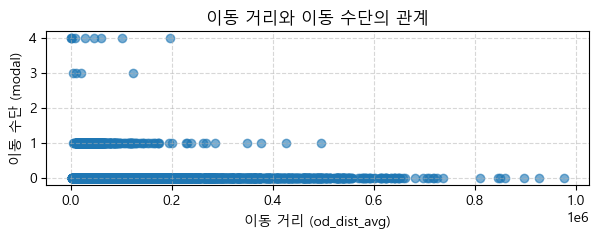

In [8]:
plt.figure(figsize=(7, 2))
plt.scatter(df_od['od_dist_avg'], df_od['modal'], alpha=0.6)

plt.xlabel('이동 거리 (od_dist_avg)')
plt.ylabel('이동 수단 (modal)')
plt.title('이동 거리와 이동 수단의 관계')

plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

- 대부분 차량(승용차, 고속버스, 택시 포함. 시외버스 미포함.)을 이용
- 100km 내에서 시내버스 이용

---

### 2) 방문객 연령대 분포 확인

In [35]:
# age별로 그룹화하고 cnts 합산
age_od_cnts = df_od.groupby('age')['od_cnts'].sum().reset_index()
age_stay_cnts = df_stay.groupby('age')['stay_cnts'].sum().reset_index()

# pd.merge(left, right, how, on, left_on, right_on, left_index, right_index)
age_cnts = pd.merge(age_od_cnts, age_stay_cnts, 'right', 'age')

age_cnts = age_cnts.fillna(0)  # NaN을 0으로 채움
age_cnts['od_cnts'] = age_cnts['od_cnts'].astype(int)

age_cnts

,age,od_cnts,stay_cnts
0,0,18563,158276
1,1,1005,47880
2,2,5530,78738
3,3,7421,173527
4,4,7775,216257
5,5,1984,157403
6,6,465,90679
7,7,102,35365
8,8,28,6529


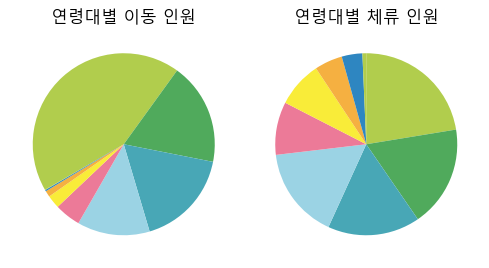

In [152]:
import matplotlib.pyplot as plt
import numpy as np

# cnts 내림차순 정렬
age_od_cnts = age_od_cnts.sort_values(by='od_cnts', ascending=False)
age_stay_cnts = age_stay_cnts.sort_values(by='stay_cnts', ascending=False)

colors4 = ['#B1CD4D', '#50aa5c', '#48A7B6','#9BD3E4', '#EC7A98', '#F9EC39', '#F5B041','#2E86C1',]

# 서브플롯 생성 (1행 2열)
fig, axes = plt.subplots(1, 2, figsize=(5, 10))

# 첫 번째 파이 차트 (이동 인원)
axes[0].pie(age_od_cnts['od_cnts'], startangle=210, counterclock=False, colors=colors4)
axes[0].set_title("연령대별 이동 인원")

# 두 번째 파이 차트 (체류 인원)
axes[1].pie(age_stay_cnts['stay_cnts'], startangle=90, counterclock=False, colors=colors4)
axes[1].set_title("연령대별 체류 인원")

plt.tight_layout()

plt.show()


- 이동 인원 순위: 00대 - 30대 - 40대 - 20대 - 50대 - 60대 - 10대 - 70대
- 체류 인원 순위: 40대 - 30대 - 00대 - 50대 - 60대 - 20대 - 10대 - 70대 - 80대

- 초등학생 자녀가 있는 가족 단위 여행객이 가장 많음.
- 10대, 20대는 상대적으로 적다. 프로그램이나 축제 특성이 10대, 20대를 잘 타겟팅하지 못한 듯. 20대를 겨냥한 듯한 EDM파티를 7일동안 행사프로그램으로 넣은 것을 봤을 때, 20대 또한 타겟팅하고 있는 것을 알 수 있음. 20대 인원이 낮은 이유가 교통편과 관련해 있을지 아래 od데이터로 파악해보기. 
- 80대: OD데이터에 측정 안되지만 체류하기는 함.
- 50,60대도 은근 많다. 50,60대는 이동 인원에서는 수가 확연히 적지만 체류 인원에서는 많은 것이 특이. (둘 다 skt에서 측정했을텐데, 이동할 때 폰을 사용 안하다면 그것 때문일 수 있는지?)
- (같은 맥락으로, 00대가 이동 인원에서 많이 차지하는 이유가 이동 시 핸드폰을 많이 사용하는 것과 관련 있는지? but *00대 측정방법 궁금)

---

### 2-2) 서울에서 출발하는 방문객 연령대 분포

In [11]:
# pd.merge(left, right, how, on, left_on, right_on, left_index, right_index)
df_od_hdongname = pd.merge(df_od, df_hdong[['행정동코드', '시도명']], 'left', left_on='origin_hdong_cd', right_on='행정동코드')
df_od_hdongname

,origin_hdong_cd,dest_hdong_cd,date,start_time,end_time,gender,age,modal,origin_purpose,dest_purpose,od_dist_avg,od_duration_avg,od_cnts,행정동코드,시도명
0,4311374100,4573031000,20230902,09:00,11:00,1,0,0.0,0.0,5,163782,109,6,4311374100,충청북도
1,4573033000,4573025000,20230902,20:00,20:00,0,3,1.0,5.0,5,20247,28,9,4573033000,전라북도
2,4812965000,4573034000,20230902,16:00,18:00,0,4,0.0,4.0,5,424072,131,7,4812965000,경상남도
3,4817073000,4573032000,20230902,13:00,16:00,1,0,0.0,0.0,5,119100,141,9,4817073000,경상남도
4,4573032000,4573025000,20230902,17:00,19:00,0,4,0.0,5.0,5,128030,118,9,4573032000,전라북도
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4168,4574036000,4573034000,20230910,12:00,12:00,0,1,1.0,5.0,5,38926,27,5,4574036000,전라북도
4169,4573033000,4573025000,20230910,12:00,12:00,1,5,0.0,5.0,5,9476,13,5,4573033000,전라북도
4170,4572025000,4573033000,20230910,18:00,18:00,0,3,0.0,5.0,5,50623,33,6,4572025000,전라북도
4171,4573025000,4573034000,20230910,11:00,12:00,0,3,0.0,5.0,5,46949,51,5,4573025000,전라북도


In [36]:
age_od_cnts = df_od.groupby('age')['od_cnts'].sum().reset_index()

total_visitors = age_od_cnts['od_cnts'].sum() 
age_od_cnts['od_percentage'] = (age_od_cnts['od_cnts'] / total_visitors) * 100

print("전체 방문객 연령대: ")
age_od_cnts

전체 방문객 연령대: 


,age,od_cnts,od_percentage
0,0,18563,43.297647
1,1,1005,2.344133
2,2,5530,12.898561
3,3,7421,17.309262
4,4,7775,18.134957
5,5,1984,4.627621
6,6,465,1.084599
7,7,102,0.237912
8,8,28,0.065309


In [38]:
age_stay_cnts = df_stay.groupby('age')['stay_cnts'].sum().reset_index()

total_visitors = age_stay_cnts['stay_cnts'].sum() 
age_stay_cnts['stay_percentage'] = (age_stay_cnts['stay_cnts'] / total_visitors) * 100

print("전체 방문객 연령대: ")
age_stay_cnts

전체 방문객 연령대: 


,age,stay_cnts,stay_percentage
0,0,158276,16.407541
1,1,47880,4.963438
2,2,78738,8.162305
3,3,173527,17.988522
4,4,216257,22.418090
5,5,157403,16.317042
6,6,90679,9.400158
7,7,35365,3.666081
8,8,6529,0.676823


In [37]:
seoul = df_od_hdongname[df_od_hdongname['시도명']=='서울특별시']

age_from_seoul = seoul.groupby('age')['od_cnts'].sum().reset_index()

total_visitors = age_from_seoul['od_cnts'].sum()
age_from_seoul['od_percentage'] = (age_from_seoul['od_cnts'] / total_visitors) * 100
# age_from_seoul.loc[age_from_seoul['age'] == 0, 'od_percentage'] = np.nan

print('서울특별시에서 출발하는 방문객 연령대: ')
age_from_seoul

서울특별시에서 출발하는 방문객 연령대: 


,age,od_cnts,od_percentage
0,0,224,47.257384
1,1,10,2.109705
2,2,138,29.113924
3,3,33,6.962025
4,4,69,14.556962


In [14]:
daejeon = df_od_hdongname[df_od_hdongname['시도명']=='대전광역시']

age_from_daejeon = daejeon.groupby('age')['od_cnts'].sum().reset_index()

total_visitors = age_from_daejeon['od_cnts'].sum() -  age_from_daejeon.loc[age_from_daejeon['age'] == 0, 'od_cnts'].values[0]
age_from_daejeon['od_percentage'] = (age_from_daejeon['od_cnts'] / total_visitors) * 100
age_from_daejeon.loc[age_from_daejeon['age'] == 0, 'od_percentage'] = np.nan

print('대전광역시에서 출발하는 방문객 연령대: ')
age_from_daejeon

대전광역시에서 출발하는 방문객 연령대: 


,age,od_cnts,od_percentage
0,0,2067,NaN
1,1,62,3.254593
2,2,861,45.196850
3,3,367,19.265092
4,4,569,29.868766
5,5,41,2.152231
6,6,5,0.262467


---

### 3) 이동거리

                 od_dist_avg  od_duration_avg
od_dist_avg         1.000000         0.813987
od_duration_avg     0.813987         1.000000
5.49991058817958
5.499910588179576


<Figure size 500x300 with 0 Axes>

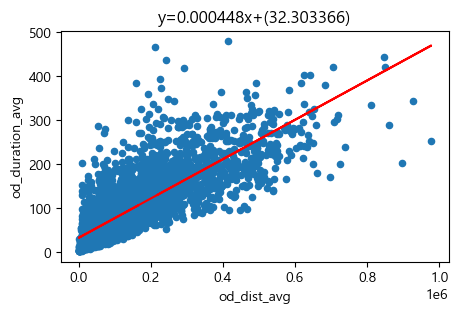

In [15]:
## 이동거리, 이동시간 상관관계 알아보기

# 상관계수
print(df_od[['od_dist_avg', 'od_duration_avg']].corr())

# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
for i in range(2):
    VIF = variance_inflation_factor(df_od[['od_dist_avg', 'od_duration_avg']], i)
    print(VIF)

# Scatter Plot and Trend Line
plt.figure(figsize=(5, 3))
df_od.plot(kind='scatter', x='od_dist_avg', y='od_duration_avg', figsize=(5, 3))
fit_weight = np.polyfit(df_od['od_dist_avg'], df_od['od_duration_avg'], 1) # x값, y값에 열 지정해주고 1차식으로 피팅한다.
trend_f = np.poly1d(fit_weight)

plt.plot(df_od['od_dist_avg'], trend_f(df_od['od_dist_avg']),"r-")
plt.title("y={:.6f}x+({:.6f})".format(fit_weight[0], fit_weight[1]))
plt.show()

In [16]:
# age별로 그룹화하고 od_dist_avg 컬럼을 평균
age_dist_avg = df_od.groupby('age')['od_dist_avg'].mean().reset_index()
age_dist_avg['od_dist_avg'] = age_dist_avg['od_dist_avg'].astype(int)
age_dist_avg

,age,od_dist_avg
0,0,134968
1,1,149834
2,2,153306
3,3,102798
4,4,113690
5,5,79917
6,6,75276
7,7,142189
8,8,166109


연령대별 평균 이동 거리 분석
- 50,60,70대가 상대적으로 작다. 50km 내외에서 옴.
- 00대가 특히 멀리서 오고, 나머지 10,20,30,40대는 70~80km 정도.

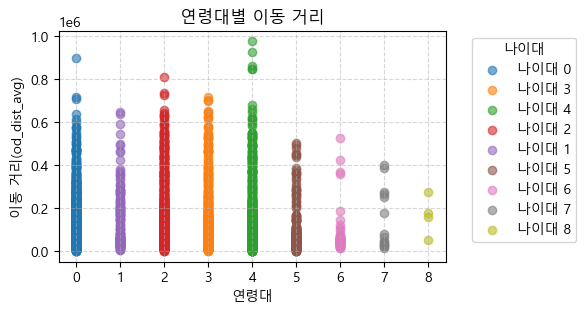

In [17]:
plt.figure(figsize=(5, 3))

# 각 나이대에 대해 점 그리기
for age in df_od['age'].unique():
    age_data = df_od[df_od['age'] == age]
    plt.scatter([age] * len(age_data), age_data['od_dist_avg'], alpha=0.6, label=f'나이대 {age}')

#plt.ylim(0, 250000)
plt.xlabel('연령대')
plt.ylabel('이동 거리(od_dist_avg)')
plt.title('연령대별 이동 거리')
plt.legend(title='나이대', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

서울-무주가 200km인데 도대체 300km이상은 뭐지..

In [18]:
filtered_df = df_od[df_od['od_dist_avg'] >= 600000]
filtered_df

,origin_hdong_cd,dest_hdong_cd,date,start_time,end_time,gender,age,modal,origin_purpose,dest_purpose,od_dist_avg,od_duration_avg,od_cnts
511291,1165058000,4573031000,20230902,08:00,13:00,1,4,0.0,0.0,5,860514,290,6
547276,4113562000,4573033000,20230902,09:00,14:00,0,3,0.0,0.0,5,625274,337,6
648012,1144068000,4573031000,20230902,09:00,16:00,1,4,0.0,0.0,5,846133,443,6
833671,4150053000,4573034000,20230902,09:00,12:00,0,2,0.0,0.0,5,725261,200,7
892428,1156054000,4573034000,20230902,16:00,20:00,0,2,0.0,5.0,5,634204,239,7
1128757,4165025000,4573033000,20230902,09:00,16:00,0,3,0.0,0.0,5,705035,421,6
2364419,4139051000,4573034000,20230902,08:00,12:00,0,2,0.0,0.0,5,625591,241,7
2577025,4111356000,4573033000,20230902,08:00,13:00,0,3,0.0,0.0,5,718668,312,6
3111104,4111761000,4573031000,20230902,14:00,19:00,1,4,0.0,0.0,5,622946,295,6
3172762,1150061100,4573032000,20230902,10:00,17:00,0,4,0.0,0.0,5,616311,385,6


In [19]:
filetered_df_hdongname = pd.merge(filtered_df[['origin_hdong_cd', 'od_dist_avg', 'od_duration_avg']], 
                                  df_hdong[['행정동코드','시도명','시군구명']], 'left', left_on='origin_hdong_cd', right_on='행정동코드')
filetered_df_hdongname

,origin_hdong_cd,od_dist_avg,od_duration_avg,행정동코드,시도명,시군구명
0,1165058000,860514,290,1165058000,서울특별시,서초구
1,4113562000,625274,337,4113562000,경기도,성남시 분당구
2,1144068000,846133,443,1144068000,서울특별시,마포구
3,4150053000,725261,200,4150053000,경기도,이천시
4,1156054000,634204,239,1156054000,서울특별시,영등포구
5,4165025000,705035,421,4165025000,경기도,포천시
6,4139051000,625591,241,4139051000,경기도,시흥시
7,4111356000,718668,312,4111356000,경기도,수원시 권선구
8,4111761000,622946,295,4111761000,경기도,수원시 영통구
9,1150061100,616311,385,1150061100,서울특별시,강서구


-> 거리 숫자에 대해서는 나중에 논의. 패턴 분석하자면 
- 00대, 30대, 40대: 먼 거리 ex.서울, 부산, 인천에서도 온다
- 가족 단위로 방문 추정. 먼 거리에서도 오지만, 가까운 거리에서 방문율도 엄청 높다. 핵가족이 무주근처에 많이 사는 건 아닐 것 같아, 주위 다른 여행지에서 오는 것이 집계된 것으로 현재까지 추정. or 택시
- 10대, 20대, 30대, 40대 평균은 비슷: 70-80km 정도. 00대는 평균이 130km. 50대, 60대는 50km. 70대는 26km.
- 평균은 비슷하지만, 10대, 20대는 200km이상은 거의 없음. 대부분 100km 내에서 옴. 50대, 60대 또한. 

C:\Users\User\AppData\Local\Temp\ipykernel_27496\1872686715.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_muju['age_str'] = df_muju['age'].map(age_mapping)
C:\Users\User\AppData\Local\Temp\ipykernel_27496\1872686715.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_muju['age_str'] = pd.Categorical(df_muju['age_str'], categories=age_order, ordered=True)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called wit

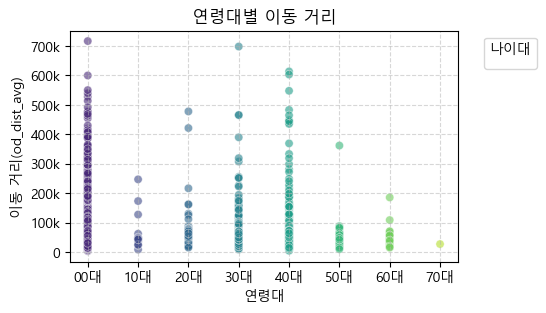

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd

# 연령대 숫자를 '10대', '20대' 등으로 변환하는 딕셔너리
age_mapping = {0: '00대', 1: '10대', 2: '20대', 3: '30대', 4: '40대', 5: '50대', 6: '60대', 7: '70대', 8: '80대'}
df_muju['age_str'] = df_muju['age'].map(age_mapping)

# x축 순서를 명시적으로 지정
age_order = ['00대', '10대', '20대', '30대', '40대', '50대', '60대', '70대', '80대']
df_muju['age_str'] = pd.Categorical(df_muju['age_str'], categories=age_order, ordered=True)

plt.figure(figsize=(5, 3))

# viridis 팔레트를 연령대 순서에 맞게 설정
palette = sns.color_palette('viridis', len(df_muju['age'].unique()))

# hue_order와 x축 정렬을 위해 age_str 사용
ax = sns.scatterplot(x='age_str', y='od_dist_avg', data=df_muju, alpha=0.6, hue='age', palette=palette, hue_order=sorted(df_muju['age'].unique()), legend=False)

# y축 값을 k 단위로 포맷팅
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '0' if x == 0 else '{:,.0f}k'.format(x / 1000)))

plt.xlabel('연령대')
plt.ylabel('이동 거리(od_dist_avg)')
plt.title('연령대별 이동 거리')
plt.legend(title='나이대', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


---

## 2. 각 연령대 분석
- 어디서 오는지, 시간, 이동 시간, 이동 수단을 보자
- 20, 50/60대 중심으로

In [21]:
# age_20 = df_od['age'] == 2
# df_od_20 = df_od[age_20]
# df_od_20

# 각 age에 대해 데이터프레임 생성
dataframes = {}

for age in range(0, 8):
    age_filter = df_od['age'] == age
    dataframes[f'age_{age}'] = df_od[age_filter]

In [22]:
dataframes['age_2']

,origin_hdong_cd,dest_hdong_cd,date,start_time,end_time,gender,age,modal,origin_purpose,dest_purpose,od_dist_avg,od_duration_avg,od_cnts
21348,4111755000,4573034000,20230902,11:00,15:00,1,2,0.0,0.0,5,585441,275,8
64428,3011074000,4573034000,20230902,12:00,13:00,0,2,0.0,0.0,5,150155,49,7
90384,4613082000,4573034000,20230902,10:00,13:00,0,2,0.0,5.0,5,504619,181,7
113385,4514065200,4573034000,20230902,10:00,12:00,0,2,0.0,5.0,5,115536,92,7
132625,4574036000,4573034000,20230902,14:00,15:00,1,2,1.0,5.0,5,44373,11,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3003233,4573035000,4573033000,20230910,10:00,10:00,0,2,0.0,5.0,5,18618,9,5
3095262,4573032000,4573025000,20230910,10:00,11:00,0,2,1.0,5.0,5,54279,34,5
3106798,4311173000,4573033000,20230910,10:00,12:00,1,2,0.0,0.0,5,160927,126,6
3199215,4573032000,4573025000,20230910,10:00,10:00,1,2,0.0,5.0,5,63622,37,5


### 1) 이동수단

C:\Users\User\AppData\Local\Temp\ipykernel_27496\3724334317.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df.loc[:, 'modal_str'] = _df['modal'].map(modal_mapping)


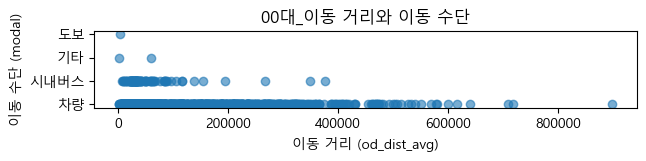

C:\Users\User\AppData\Local\Temp\ipykernel_27496\3724334317.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df.loc[:, 'modal_str'] = _df['modal'].map(modal_mapping)


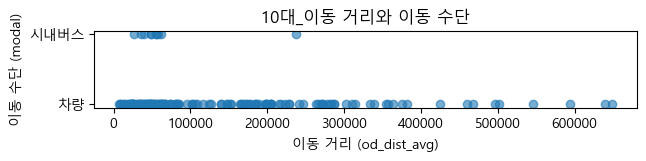

C:\Users\User\AppData\Local\Temp\ipykernel_27496\3724334317.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df.loc[:, 'modal_str'] = _df['modal'].map(modal_mapping)


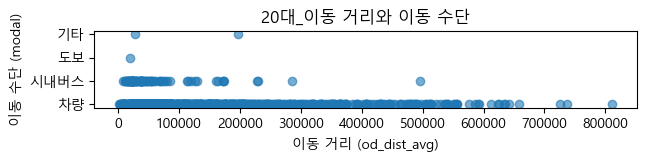

C:\Users\User\AppData\Local\Temp\ipykernel_27496\3724334317.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df.loc[:, 'modal_str'] = _df['modal'].map(modal_mapping)


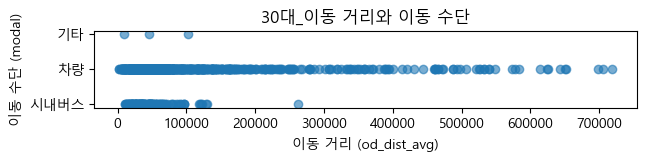

C:\Users\User\AppData\Local\Temp\ipykernel_27496\3724334317.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df.loc[:, 'modal_str'] = _df['modal'].map(modal_mapping)


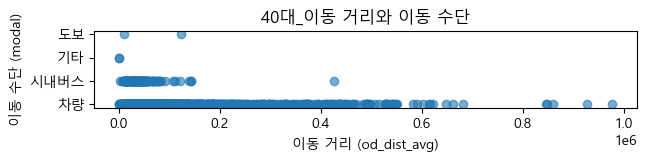

C:\Users\User\AppData\Local\Temp\ipykernel_27496\3724334317.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df.loc[:, 'modal_str'] = _df['modal'].map(modal_mapping)


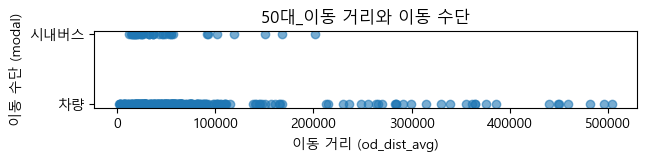

C:\Users\User\AppData\Local\Temp\ipykernel_27496\3724334317.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df.loc[:, 'modal_str'] = _df['modal'].map(modal_mapping)


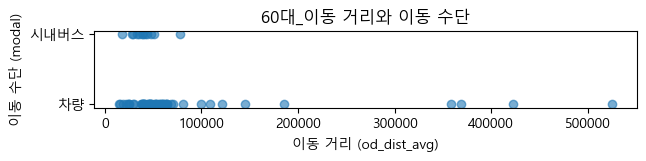

C:\Users\User\AppData\Local\Temp\ipykernel_27496\3724334317.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df.loc[:, 'modal_str'] = _df['modal'].map(modal_mapping)


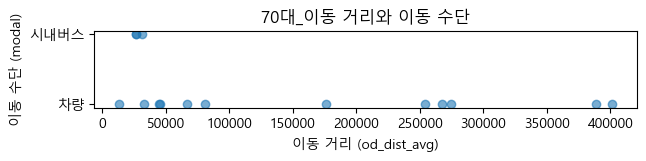

In [23]:
modal_mapping = {
    0: '차량',
    1: '시내버스',
    2: '지하철',
    3: '도보',
    4: '기타',
    5: '철도',
    6: '시외고속버스',
    7: '항공기',
}

for i in range(0,8):
    _df = dataframes['age_'+str(i)]
    plt.figure(figsize=(7, 1))

    _df.loc[:, 'modal_str'] = _df['modal'].map(modal_mapping)

    plt.scatter(_df['od_dist_avg'], _df['modal_str'], alpha=0.6)
    
    plt.xlabel('이동 거리 (od_dist_avg)')
    plt.ylabel('이동 수단 (modal)')
    plt.title(f'{i}0대_이동 거리와 이동 수단')

    unique_modal_values = _df['modal_str'].unique()
    plt.yticks(unique_modal_values)
    
    plt.show()


- 50,60대 시내버스 이용률 낮음.
- 전체 시내버스 이용량 중 00,20,30,40대의 이용량이 많음. 

In [167]:
modal_od_cnts_sum = df_od.groupby('modal')['od_cnts'].sum().reset_index()
new_rows = pd.DataFrame({'modal': [2, 5, 6], 'od_cnts': [0, 0, 0]})
modal_od_cnts_sum = pd.concat([modal_od_cnts_sum, new_rows], ignore_index=True)
modal_od_cnts_sum = modal_od_cnts_sum.sort_values(by='modal').reset_index(drop=True)

modal_od_cnts_sum

,modal,od_cnts
0,0.0,38019
1,1.0,4771
2,2.0,0
3,3.0,24
4,4.0,59
5,5.0,0
6,6.0,0


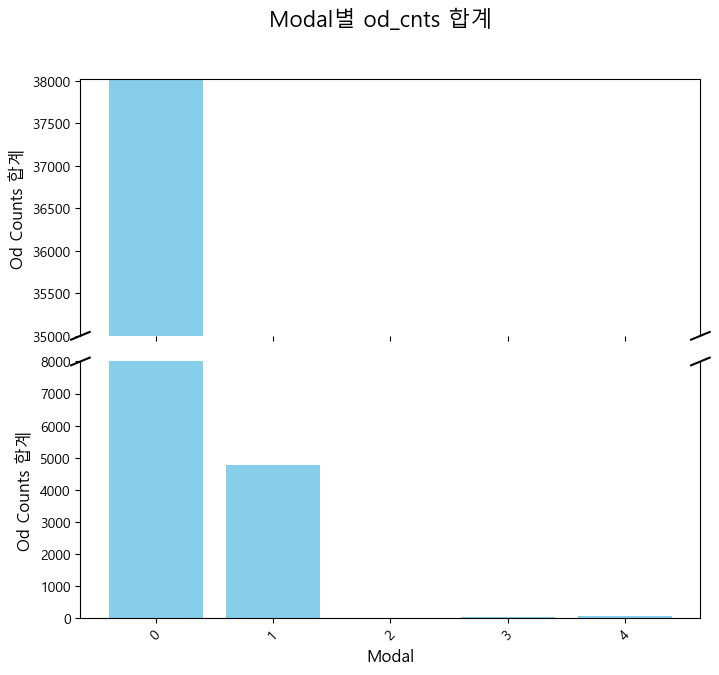

In [161]:
import matplotlib.pyplot as plt
import numpy as np


# 막대그래프 그리기
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 7))

# y축이 끊어진 부분을 설정 (예시: 0 ~ 1000, 5000 이상)
ax1.bar(modal_od_cnts_sum['modal'], modal_od_cnts_sum['od_cnts'], color='skyblue')
ax2.bar(modal_od_cnts_sum['modal'], modal_od_cnts_sum['od_cnts'], color='skyblue')

# y축 범위 설정
ax1.set_ylim(35000, modal_od_cnts_sum['od_cnts'].max())  # 큰 값들만 표시 (예시)
ax2.set_ylim(0, 8000)  # 작은 값들만 표시 (예시)

# 축을 끊은 효과 표시 (시각적 구분을 위한 대각선)
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.tick_params(labeltop=False)  # 상단의 눈금 제거
ax2.xaxis.tick_bottom()

# 대각선 추가
d = .015  # 대각선 크기
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)        # 좌측 대각선
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # 우측 대각선

kwargs.update(transform=ax2.transAxes)  # 아래쪽 축에 대각선 추가
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # 좌측 대각선
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # 우측 대각선

# 그래프 제목 및 축 레이블 설정
ax2.set_xlabel('Modal', fontsize=12)
ax1.set_ylabel('Od Counts 합계', fontsize=12)
ax2.set_ylabel('Od Counts 합계', fontsize=12)
fig.suptitle('Modal별 od_cnts 합계', fontsize=16)

# 그래프 간 간격을 수동으로 조정하여 잘림 방지
fig.subplots_adjust(hspace=0.1)

# 그래프 표시
plt.xticks(rotation=45)  # x축 레이블 회전 (필요 시)
plt.show()


In [168]:
modal_od_cnts_sum

,modal,od_cnts
0,0.0,38019
1,1.0,4771
2,2.0,0
3,3.0,24
4,4.0,59
5,5.0,0
6,6.0,0


In [184]:
modal_od_cnts_new = pd.DataFrame({
    'modal': ['차량', '시내버스', '도보', '기타', '기차', '시외버스'],
    'od_cnts': [10, 3, 1, 1, 0.1, 0.1]
})
modal_od_cnts_new

,modal,od_cnts
0,차량,10.0
1,시내버스,3.0
2,도보,1.0
3,기타,1.0
4,기차,0.1
5,시외버스,0.1


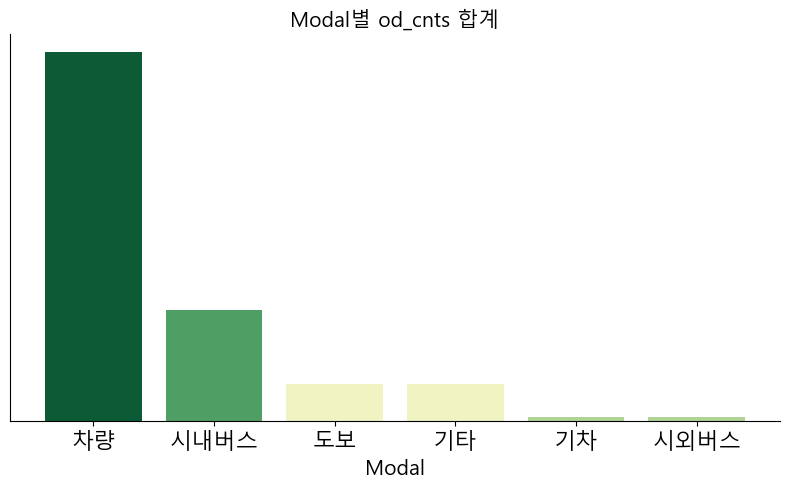

In [185]:
# 색상 지정
colors = ['#0d5b36ff', '#4f9e64ff', '#f0f4c2ff', '#f0f4c2ff', '#b0d498ff', '#b0d498ff', ]

# 막대그래프 그리기
plt.figure(figsize=(8, 5))
plt.bar(modal_od_cnts_new['modal'], modal_od_cnts_new['od_cnts'], color=colors)

# 그래프 제목 및 축 레이블 설정
plt.title('Modal별 od_cnts 합계', fontsize=15)
plt.xlabel('Modal', fontsize=15)

# y축 라벨 제거
plt.gca().axes.yaxis.set_visible(False)

# 위쪽, 오른쪽 테두리 없애기
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# 그래프 표시
plt.xticks(rotation=0, fontsize=16)
plt.tight_layout()
plt.show()

### 2) 도착시간

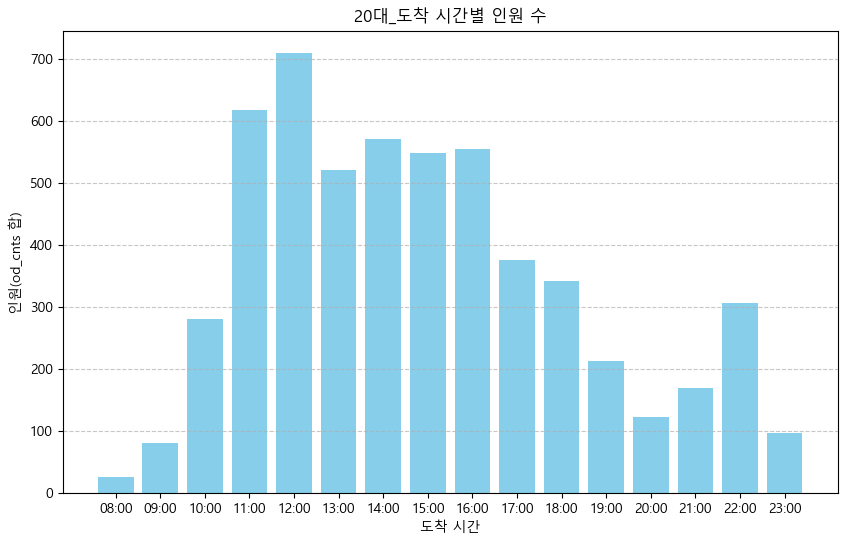

In [24]:
# 도착시간을 기준으로 od_cnts를 합산
grouped_data = dataframes['age_2'].groupby('end_time')['od_cnts'].sum().reset_index()

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(grouped_data['end_time'], grouped_data['od_cnts'], color='skyblue')

# 그래프 레이블 설정
plt.xlabel('도착 시간')
plt.ylabel('인원(od_cnts 합)')
plt.title('20대_도착 시간별 인원 수')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


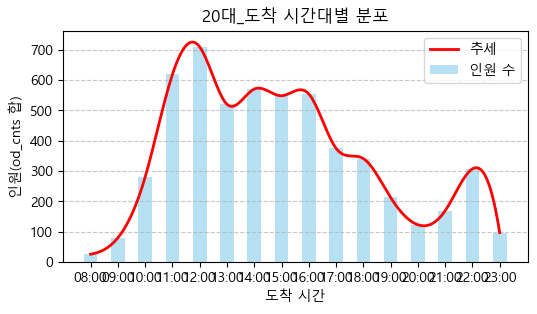

In [25]:
from scipy.interpolate import make_interp_spline

# 도착 시간 문자열을 숫자 형태로 변환 (예: 08:00 -> 8.0)
grouped_data['end_time_numeric'] = pd.to_datetime(grouped_data['end_time'], format='%H:%M').dt.hour

# 부드러운 곡선을 위해 x, y 값 설정
x = grouped_data['end_time_numeric']
y = grouped_data['od_cnts']

# x를 300개의 점으로 보간
xnew = np.linspace(x.min(), x.max(), 300)
spl = make_interp_spline(x, y, k=3)  # 부드러운 곡선을 위해 보간 (k: 차수)
y_smooth = spl(xnew)

# 막대 그래프와 부드러운 곡선 그리기
plt.figure(figsize=(6, 3))

# 막대 그래프 그리기
plt.bar(x, y, width=0.5, color='skyblue', alpha=0.6, label='인원 수')

# 부드러운 곡선 그리기
plt.plot(xnew, y_smooth, color='red', linestyle='-', linewidth=2, label='추세')

# 그래프 레이블 설정
plt.xlabel('도착 시간')
plt.ylabel('인원(od_cnts 합)')
plt.title('20대_도착 시간대별 분포')
plt.xticks(x, grouped_data['end_time'])  # 원래의 도착시간 레이블 사용

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()


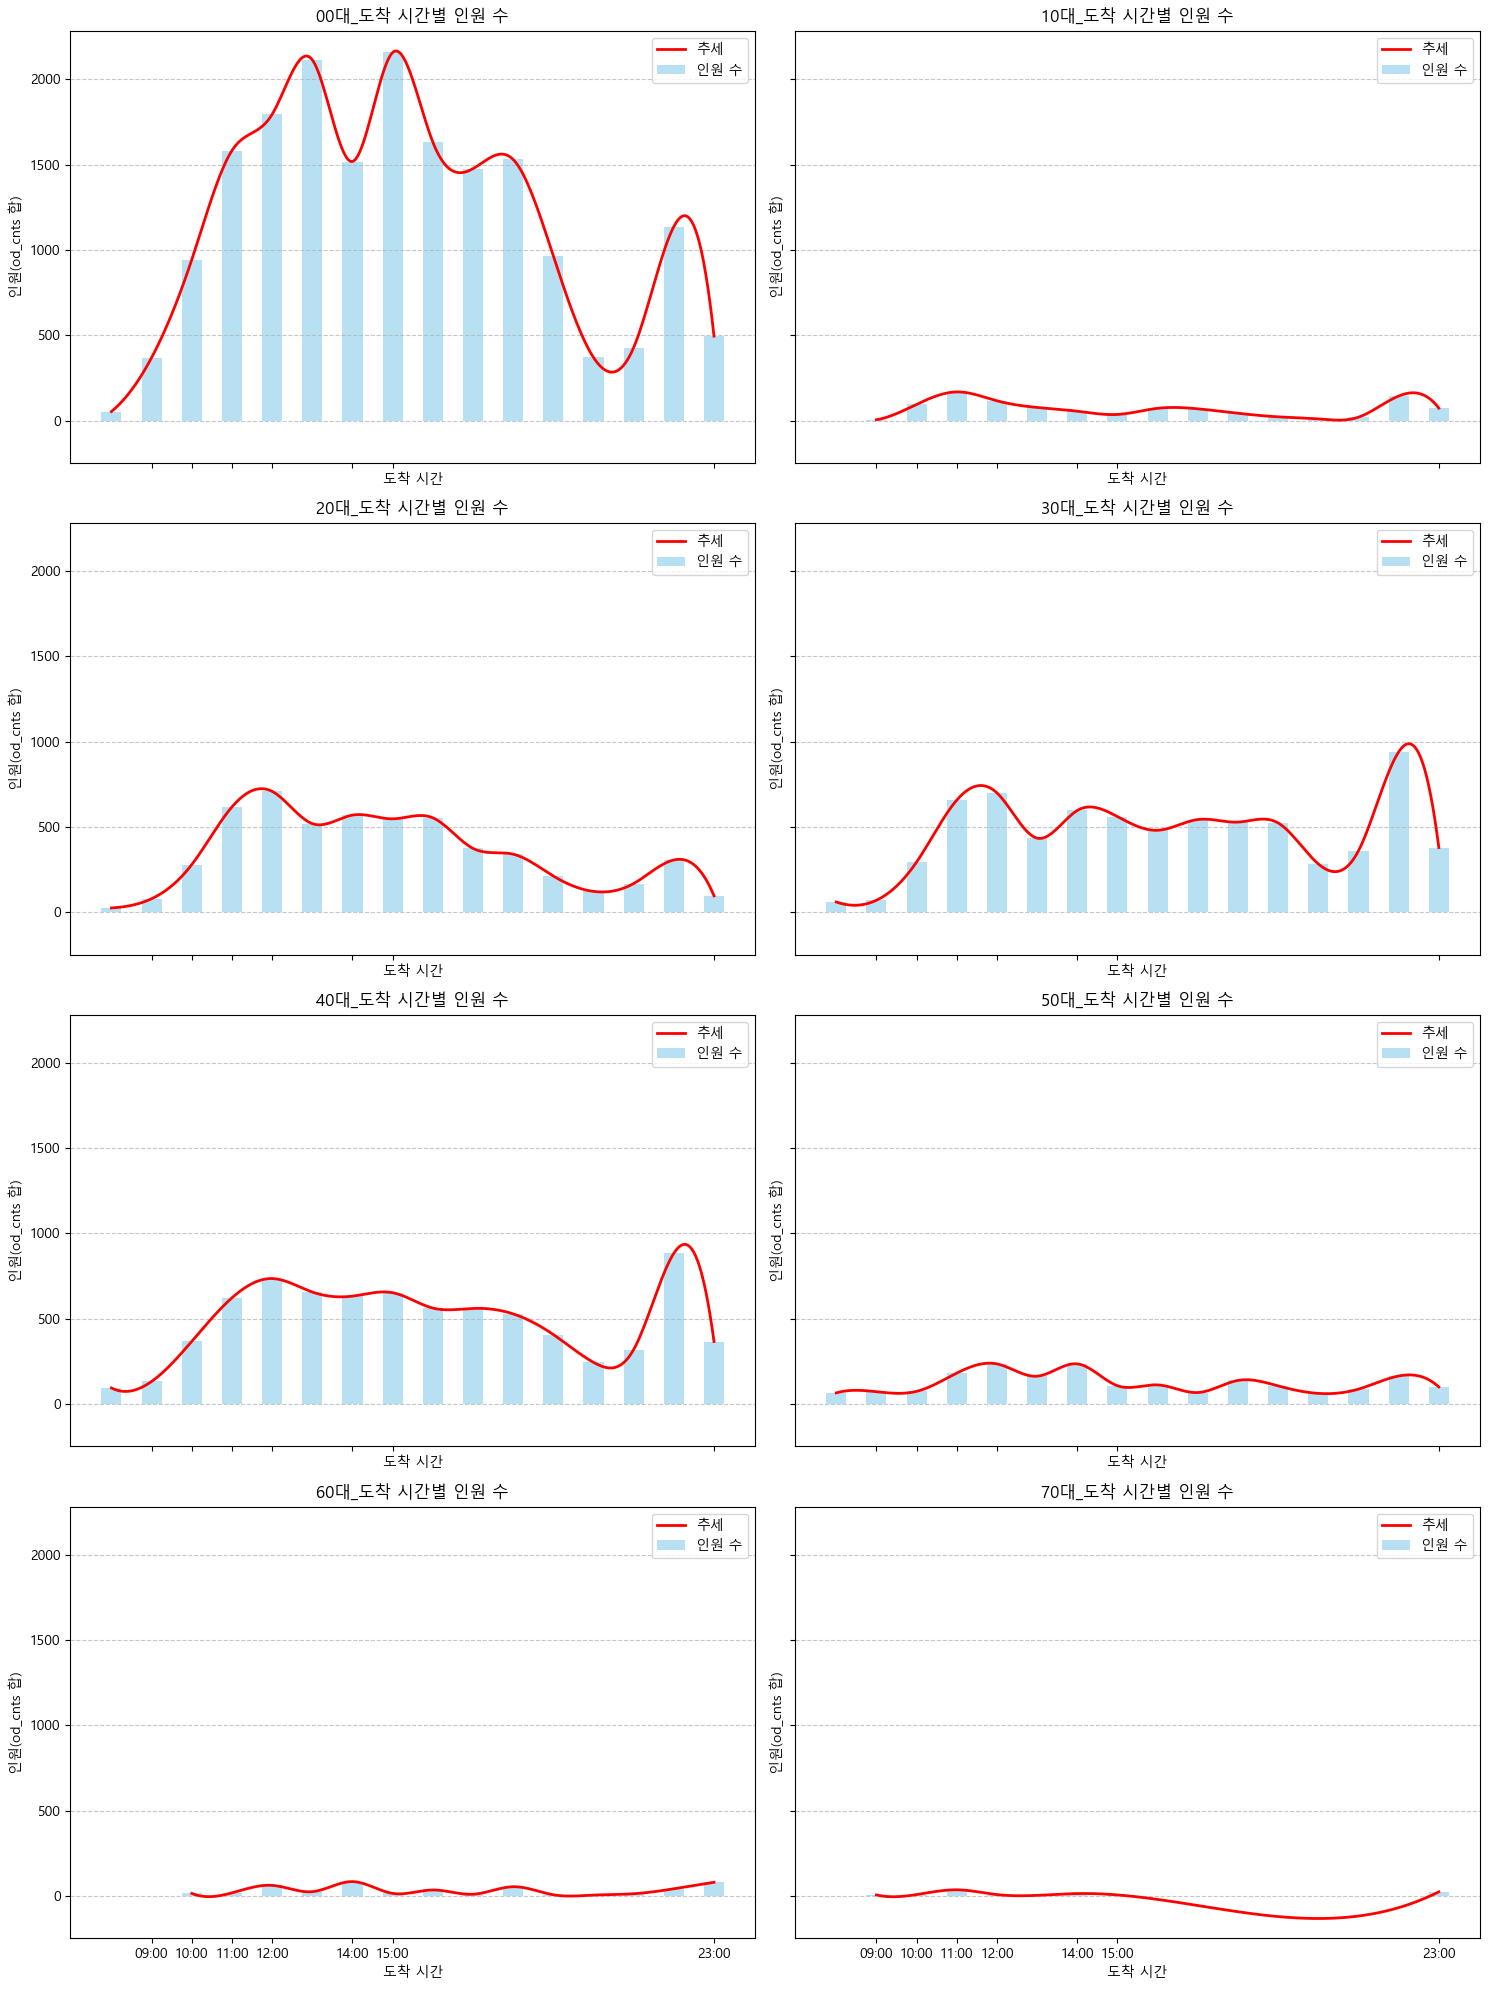

In [26]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20), sharex=True, sharey=True)

for i in range(8):  # 0대부터 70대까지 (0~7)
    # 데이터프레임 가져오기 (예: age_0, age_1, ..., age_7)
    _df = dataframes['age_' + str(i)]
    
    # 도착시간을 기준으로 od_cnts를 합산
    grouped_data = _df.groupby('end_time')['od_cnts'].sum().reset_index()

    # 도착 시간 문자열을 숫자 형태로 변환 (예: 08:00 -> 8.0)
    grouped_data['end_time_numeric'] = pd.to_datetime(grouped_data['end_time'], format='%H:%M').dt.hour

    # 부드러운 곡선을 위해 x, y 값 설정
    x = grouped_data['end_time_numeric']
    y = grouped_data['od_cnts']

    # x를 300개의 점으로 보간
    if len(x) > 1:  # 데이터 포인트가 1개 이상일 때만 보간
        xnew = np.linspace(x.min(), x.max(), 300)
        spl = make_interp_spline(x, y, k=3)  # 부드러운 곡선을 위해 보간 (k: 차수)
        y_smooth = spl(xnew)
    else:
        xnew, y_smooth = x, y  # 데이터 포인트가 적을 때는 보간하지 않음

    # 서브플롯 선택
    row, col = divmod(i, 2)
    ax = axes[row, col]

    # 막대 그래프 그리기
    ax.bar(x, y, width=0.5, color='skyblue', alpha=0.6, label='인원 수')

    # 부드러운 곡선 그리기
    ax.plot(xnew, y_smooth, color='red', linestyle='-', linewidth=2, label='추세')

    # y축 범위를 각 그래프에 맞게 설정 (최대값에 여유 추가)
    #y_max = y.max() * 1.1  # 최대값의 110% 정도로 설정하여 여유 추가
    #ax.set_ylim(0, y_max)

    # 그래프 레이블 설정
    ax.set_xlabel('도착 시간')
    ax.set_ylabel('인원(od_cnts 합)')
    ax.set_title(f'{i}0대_도착 시간별 인원 수')
    ax.set_xticks(x)
    ax.set_xticks(x, grouped_data['end_time'])  # 원래의 도착시간 레이블 사용

    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.legend()
    
# # 나이대가 8개라서 남은 9번째 서브플롯을 제거
# fig.delaxes(axes[2, 2])

# 전체 레이아웃 조정
plt.tight_layout()
plt.show()

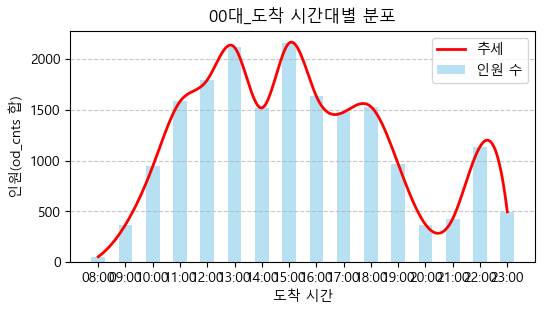

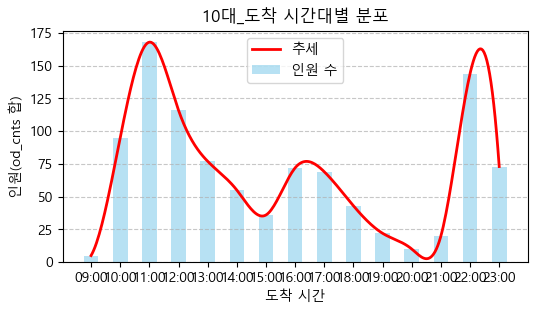

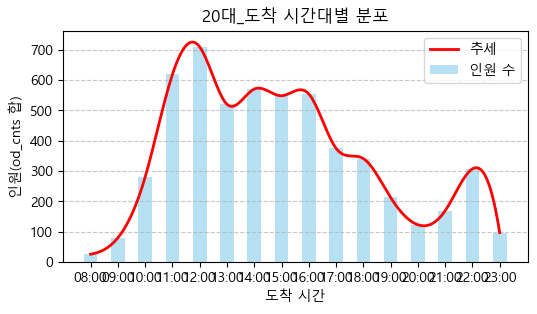

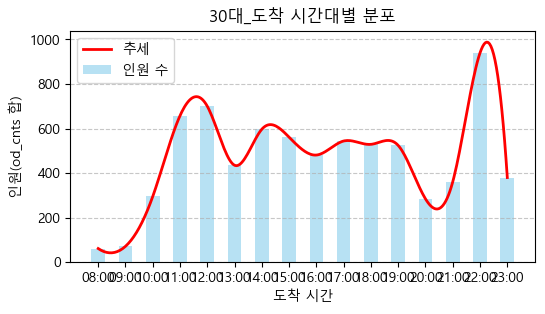

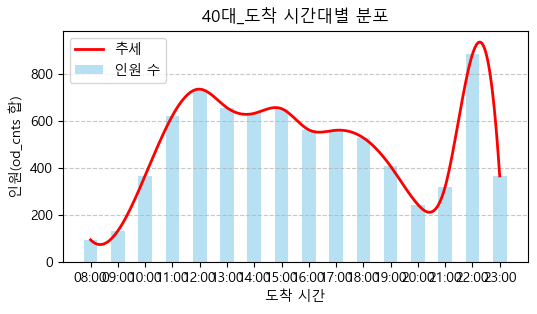

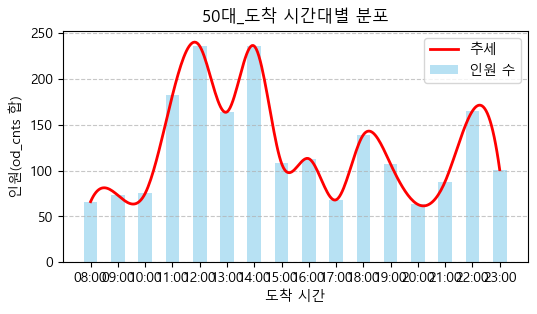

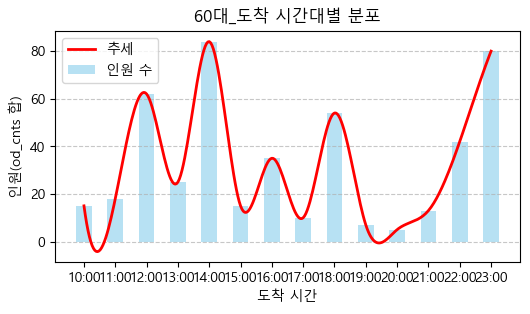

c:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


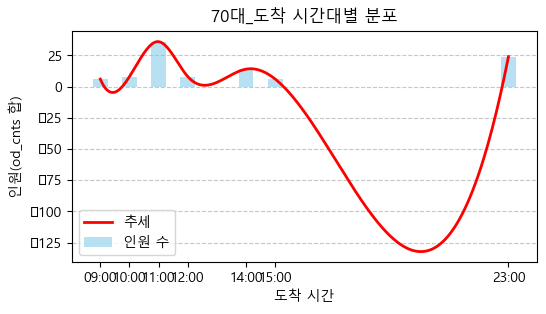

In [27]:
for i in range(8):  # 0대부터 70대까지 (0~7)
    # 데이터프레임 가져오기 (예: age_0, age_1, ..., age_7)
    _df = dataframes['age_' + str(i)]
    
    # 도착시간을 기준으로 od_cnts를 합산
    grouped_data = _df.groupby('end_time')['od_cnts'].sum().reset_index()

    # 도착 시간 문자열을 숫자 형태로 변환 (예: 08:00 -> 8.0)
    grouped_data['end_time_numeric'] = pd.to_datetime(grouped_data['end_time'], format='%H:%M').dt.hour
    
    # 부드러운 곡선을 위해 x, y 값 설정
    x = grouped_data['end_time_numeric']
    y = grouped_data['od_cnts']
    
    # x를 300개의 점으로 보간
    if len(x) > 1:  # 데이터 포인트가 1개 이상일 때만 보간
        xnew = np.linspace(x.min(), x.max(), 300)
        spl = make_interp_spline(x, y, k=3)  # 부드러운 곡선을 위해 보간 (k: 차수)
        y_smooth = spl(xnew)
    else:
        xnew, y_smooth = x, y  # 데이터 포인트가 적을 때는 보간하지 않음
    
    # 막대 그래프와 부드러운 곡선 그리기
    plt.figure(figsize=(6, 3))
    
    # 막대 그래프 그리기
    plt.bar(x, y, width=0.5, color='skyblue', alpha=0.6, label='인원 수')
    
    # 부드러운 곡선 그리기
    plt.plot(xnew, y_smooth, color='red', linestyle='-', linewidth=2, label='추세')
    
    # 그래프 레이블 설정
    plt.xlabel('도착 시간')
    plt.ylabel('인원(od_cnts 합)')
    plt.title(f'{i}0대_도착 시간대별 분포')
    plt.xticks(x, grouped_data['end_time'])  # 원래의 도착시간 레이블 사용
    
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend()
    # plt.savefig(f'time_age{i}.png', dpi=300, bbox_inches='tight')
    plt.show()


## 3. 축제 기간 내 일별 분석

- 연령대별 일별 방문객 비교.
- stay data
- 일별로 그룹화해서 stay_cnts 합산 

In [28]:
# 각 age에 대해 데이터프레임 생성 (STAY데이터)
dataframes_stay = {}

for age in range(0, 8):
    age_filter = df_stay['age'] == age
    dataframes_stay[f'age_{age}'] = df_stay[age_filter]

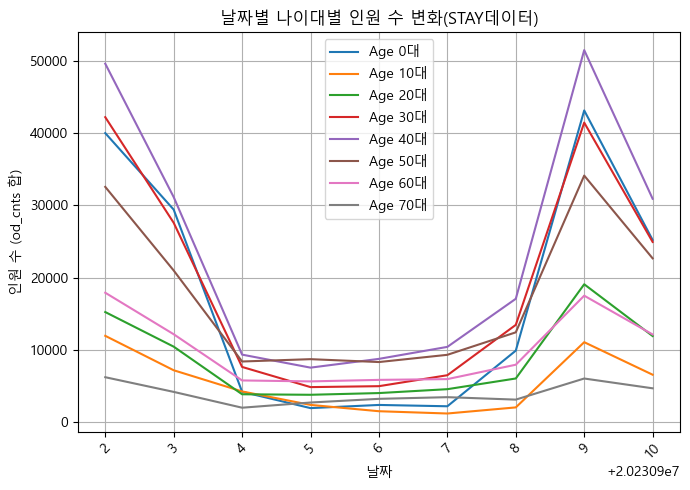

In [29]:
# 그래프 설정
plt.figure(figsize=(7, 5))

# 각 나이대별 데이터프레임을 사용하여 선 그래프 생성
for i in range(0, 8):
    _df = dataframes_stay['age_' + str(i)]
    # 날짜별로 od_cnts 합산
    df_grouped = _df.groupby('date')['stay_cnts'].sum().reset_index()

    # 선 그래프 그리기
    plt.plot(df_grouped['date'], df_grouped['stay_cnts'], label=f'Age {i * 10}대')

# 그래프 레이블 설정
plt.xlabel('날짜')
plt.ylabel('인원 수 (od_cnts 합)')
plt.title('날짜별 나이대별 인원 수 변화(STAY데이터)')
plt.xticks(rotation=45)
plt.legend()

# 그래프 출력
plt.grid(True)
plt.tight_layout()
plt.show()


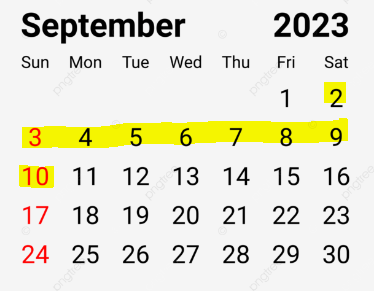

In [30]:
df_od.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4173 entries, 1096 to 3249613
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   origin_hdong_cd  4173 non-null   int64  
 1   dest_hdong_cd    4173 non-null   int64  
 2   date             4173 non-null   int64  
 3   start_time       4173 non-null   object 
 4   end_time         4173 non-null   object 
 5   gender           4173 non-null   int64  
 6   age              4173 non-null   int64  
 7   modal            4173 non-null   float64
 8   origin_purpose   4172 non-null   float64
 9   dest_purpose     4173 non-null   int64  
 10  od_dist_avg      4173 non-null   int64  
 11  od_duration_avg  4173 non-null   int64  
 12  od_cnts          4173 non-null   int64  
dtypes: float64(2), int64(9), object(2)
memory usage: 456.4+ KB


In [31]:
dataframes_od_date = {}
dates = [20230902,20230903,20230904,20230905,20230906,20230907,20230908,20230909,20230910]
times = sorted(list(df_od['end_time'].unique()))
print(times)

for date in dates:
    date_filter = df_od[df_od['date'] == date]
    grouped_date = date_filter.groupby('end_time')['od_cnts'].sum().reset_index()
    dataframes_od_date[f'date_{date}'] = grouped_date

dataframes_od_date['date_20230903']

['08:00', '09:00', '10:00', '11:00', '12:00', '13:00', '14:00', '15:00', '16:00', '17:00', '18:00', '19:00', '20:00', '21:00', '22:00', '23:00']


,end_time,od_cnts
0,08:00,94
1,09:00,266
2,10:00,584
3,11:00,1132
4,12:00,977
5,13:00,793
6,14:00,570
7,15:00,488
8,16:00,334
9,17:00,187


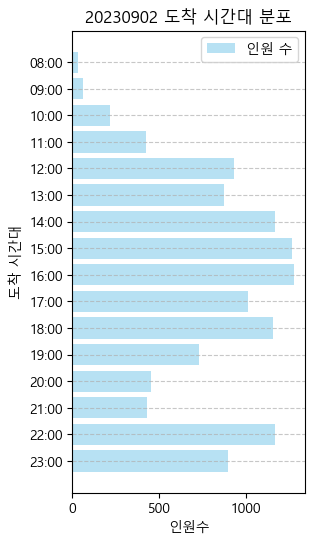

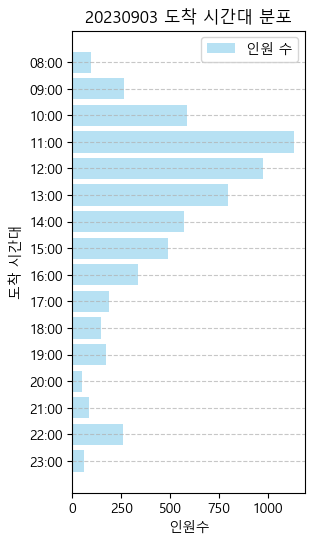

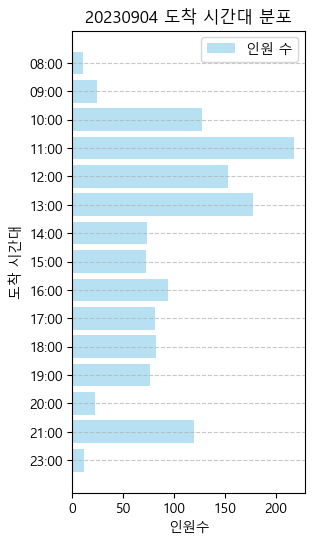

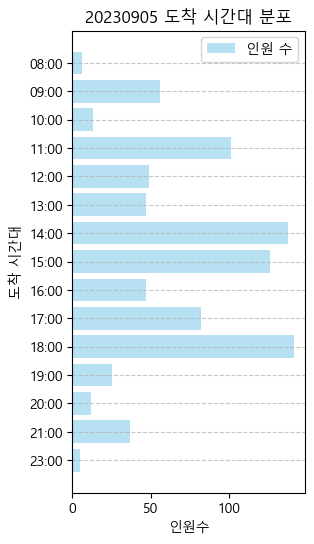

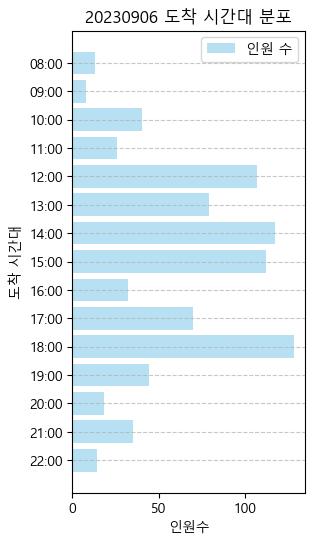

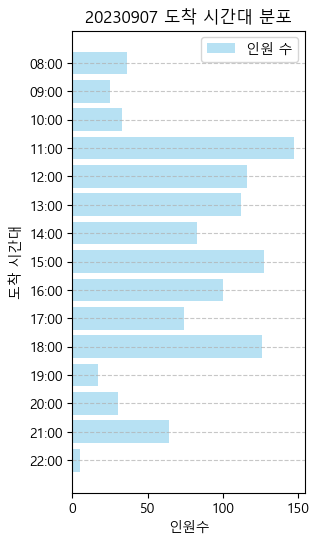

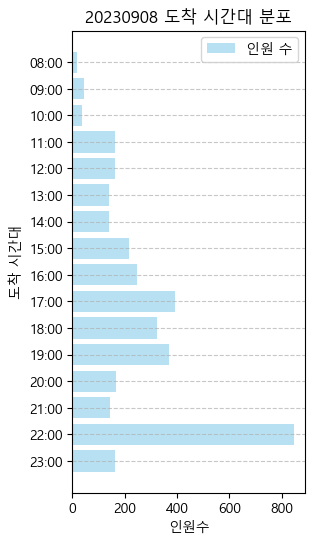

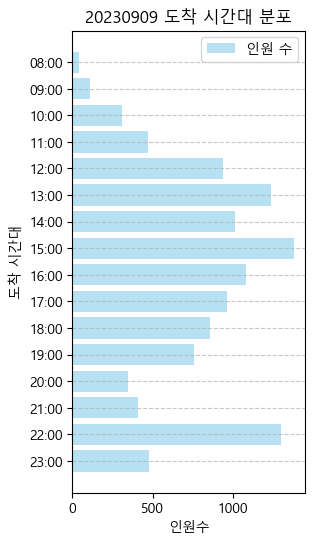

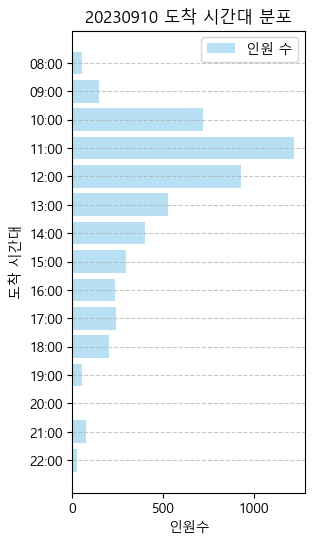

In [32]:
dates = [20230902,20230903,20230904,20230905,20230906,20230907,20230908,20230909,20230910]

for date in dates:  # 0대부터 70대까지 (0~7)
    # 데이터프레임 가져오기 (예: age_0, age_1, ..., age_7)
    _df = dataframes_od_date['date_' + str(date)]

    plt.figure(figsize=(3,6))
    
    # 막대 그래프 그리기
    plt.barh(_df['end_time'], _df['od_cnts'], color='skyblue', alpha=0.6, label='인원 수')
    
    # 부드러운 곡선 그리기
    #plt.plot(xnew, y_smooth, color='red', linestyle='-', linewidth=2, label='추세')
    plt.gca().invert_yaxis()
    
    # 그래프 레이블 설정
    plt.xlabel('인원수')
    plt.ylabel('도착 시간대')
    plt.title(f'{date} 도착 시간대 분포')
    
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend()
    # plt.savefig(f'barh_date_time_count_{str(date)}.png', dpi=300, bbox_inches='tight')
    plt.show()
